# Lab 3. Genetic Algorithms

## Task 3.1 The Travelling Salesman Problem (TSP)

---

## Problem Descriptions
The TSP is described as follows. A salesman has to visit all N cities 1,2,…,N.
Assuming the distances between cities are known, find the best sequence of cities to minimise the total travel distance.

## Implementation and Results

In the code below, we have created a class **TSP** implementing solution using Genetic Algorithm for the travelling salesman problem, constructed using two parameters: city_count, which is the number of cities to be visited, and distance_map, which is a 2D matrix of distances between the cities. The class contains the following methods:
1.   **generate_initial_population**: generates a population of list of randomly ordered cities representing the order of traversal.
2.   **fitness**: returns the fitness of a chromosome i.e. the inverse of the sum of distances, implying a lower sum of distances is considered to be more fit. If the sum of distances is less than SATISFACTORY_COST, the method returns 100, which terminates the GA.
3.   **crossover**: genetic operator that performs crossover on two lists and returns two new lists created through combination of the two parent lists at a random crossover point.
4.   **mutation**: genetic operator that performs mutation by swapping the values at two random indexes in the list.
5.   **selection**: performs selection using the roulette wheel method
6.   **genetic_algorithm**: main method for running the GA. It performs the genetic operators on the population until either termination condition is reached or the number of generations are completed.
7.   **sum_of_distance**: returns sum of distances for visiting the cities in the list and returning to the starting city.
8.   Other utility function such as *mutate_until_unique* to reduce number of generations needed to reach the solution, *individual_crossover* to perform as auxilary method for *crossover*, *get_min_max_fitness* to get minimum and maximum fitness in a generation, and *display_population* to display all chromosomes in the population.

Comments are included in the code to explain the purpose of each method.



In [1]:
import random

N_GENERATION = 5000 # No. of generations
POPULATION_SIZE = 500 # No. of chromosomes per generation
CITY_COUNT = 17 # Count of Cities
EXP_FACTOR = 1 # Exponential power of selection - Higher power, better chances for selection of higher fit ones
NO_OF_PARENTS_FOR_SELECTION = 50 # No of parents for selection
SATISFACTORY_COST = 2090 # Satisfactory Cost for program termination

DISTANCE_MATRIX =  [[0, 633, 257, 91, 412, 150, 80, 134, 259, 505, 353, 324, 70, 211, 268, 246, 121],
                [633, 0, 390, 661, 227, 488, 572, 530, 555, 289, 282, 638, 567, 466, 420, 745, 518],
                [257, 390, 0, 228, 169, 112, 196, 154, 372, 262, 110, 437, 191, 74, 53, 472, 142],
                [91, 661, 228, 0, 383, 120, 77, 105, 175, 476, 324, 240, 27, 182, 239, 237, 84],
                [412, 227, 169, 383, 0, 267, 351, 309, 338, 196, 61, 421, 346, 243, 199, 528, 297],
                [150, 488, 112, 120, 267, 0, 63, 34, 264, 360, 208, 329, 83, 105, 123, 364, 35],
                [80, 572, 196, 77, 351, 63, 0, 29, 232, 444, 292, 297, 47, 150, 207, 332, 29],
                [134, 530, 154, 105, 309, 34, 29, 0, 249, 402, 250, 314, 68, 108, 165, 349, 36],
                [259, 555, 372, 175, 338, 264, 232, 249, 0, 495, 352, 95, 189, 326, 383, 202, 236],
                [505, 289, 262, 476, 196, 360, 444, 402, 495, 0, 154, 578, 439, 336, 240, 685, 390],
                [353, 282, 110, 324, 61, 208, 292, 250, 352, 154, 0, 435, 287, 184, 140, 542, 238],
                [324, 638, 437, 240, 421, 329, 297, 314, 95, 578, 435, 0, 254, 391, 448, 157, 301],
                [70, 567, 191, 27, 346, 83, 47, 68, 189, 439, 287, 254, 0, 145, 202, 289, 55],
                [211, 466, 74, 182, 243, 105, 150, 108, 326, 336, 184, 391, 145, 0, 57, 426, 96],
                [268, 420, 53, 239, 199, 123, 207, 165, 383, 240, 140, 448, 202, 57, 0, 483, 153],
                [246, 745, 472, 237, 528, 364, 332, 349, 202, 685, 542, 157, 289, 426, 483, 0, 336],
                [121, 518, 142, 84, 297, 35, 29, 36, 236, 390, 238, 301, 55, 96, 153, 336, 0]]
                
# Optimal Route and associated cost
OptTour = [0, 15, 11, 8, 4, 1, 9, 10, 2, 14, 13, 16, 5, 7, 6, 12, 3]
OptDistance = 2085

# Travelling Salesman class
class TSP:
  def __init__(self, city_count, distance_map):
    self.city_count = city_count
    self.city_distances = distance_map

  # Initial Population Generator
  def generate_initial_population(self, population_size):
    '''Generates population of randomly ordered strings representing city order; All the strings start with 0 i.e. start point is city 0'''
    population=[]
    for i in range(population_size):
      l = list(range(1,self.city_count))
      random.shuffle(l)
      l = [0] + l
      population.append(l)
    return population
  
  # Display the population
  def display_population(self, population, rows_to_display=None):
    if(rows_to_display is None): rows_to_display=len(population)
    for i in population[:rows_to_display]:
      print(i,self.sum_of_distance(i))

  # Function to return round trip distance in a particular chromosome
  def sum_of_distance(self, chromosome):
    sum1=0
    chromosome_size=len(chromosome)
    for i in range(chromosome_size):
      pop_i, pop_j = chromosome[i], chromosome[(i+1)%chromosome_size]
      sum1+=self.city_distances[pop_i][pop_j]
    return sum1

  # greater fitness is better, this means lower sum of distances
  def fitness(self, curr_population):
    f_value = self.sum_of_distance(curr_population)
    if(f_value<SATISFACTORY_COST): 
      return 100 #termination condition
    return 1/f_value
  
  # function to return maximum and minimum fitness in the generation
  def get_min_max_fitness(self, population):
    fitness_array = [self.fitness(x) for x in population]
    return min(fitness_array), max(fitness_array)
  
  # Auxilary Crossover function to generate VALID paths after crossover
  def individual_crossover(self, lst1, lst2, crossover_point):
    new_lst=lst1[0:crossover_point]
    duplicate_values_counter=0
    
    #loop to copy elements from list 2, skip if already present in list 1, increment duplicate values counter
    for i in lst2[crossover_point:]:
      if(i in new_lst): duplicate_values_counter+=1
      else: new_lst.append(i)

    # loop for adding elements from list 2, which were already present in list 1
    curr=0 
    while(duplicate_values_counter>0):
      elem = lst2[curr]
      if(elem not in new_lst): new_lst.append(elem); duplicate_values_counter-=1
      curr+=1

    return new_lst

  # Genetic operator: Crossover
  def crossover(self, lst1, lst2):
    indexes = range(len(lst1))
    crossover_point = random.choice(indexes)
    
    new_lst1 = self.individual_crossover(lst1, lst2, crossover_point)
    new_lst2 = self.individual_crossover(lst2, lst1, crossover_point)

    return new_lst1, new_lst2

  # Genetic operator: Mutation
  def mutation(self, lst):
    indexes = range(1,len(lst))
    mutation_point1 = random.choice(indexes)
    mutation_point2 = random.choice(indexes)
    lst[mutation_point1], lst[mutation_point2] = lst[mutation_point2], lst[mutation_point1] 
    return lst
  
  # Prevents duplicate children in the population
  def mutate_until_unique(self,child,curr_generation):
    child=self.mutation(child)
    while(child in curr_generation):
      child = self.mutation(child)
    return child

  # Genetic operator: Selection using Roulette Wheel method
  def selection(self, curr_generation):
    number_of_parents = NO_OF_PARENTS_FOR_SELECTION #no of parents to be selected
    parents = []
    curr_generation.sort(key = self.fitness, reverse=True) #sorts the population list in DESCENDING ORDER (if True) or ASCENDING ORDER (if False) based on fitness values

    for i in range(number_of_parents):
      rand = random.random() #generate a random float between 0 and 1
      rand_Index = int(POPULATION_SIZE * pow(rand, EXP_FACTOR)) #grow the random float using exponential power so that the better chances of selection are from ones that have highest fitness 
      parents.append(curr_generation[rand_Index])
    
    return parents


  # Genetic Algorithm
  def genetic_algorithm(self, population, generation_count):
    population.sort(key = self.fitness, reverse=True) # Descending sort based on fitness values

    generation=[]
    generation.append([x for x in population]) #copy initial population in generation 0
    
    min_fitness, max_fitness = self.get_min_max_fitness(generation[0])
    print(f"minimum and maximum fitness for initial population is {round(min_fitness,2), round(max_fitness,2)}, min sum of distance is **{1/max_fitness}**")

    for i in range(1,generation_count+1):

      generation.append([x for x in generation[i-1]]) #clone previous generation

      parents = self.selection(generation[i])

      generation[i].sort(key = self.fitness, reverse=True) 

      for a in range(0,NO_OF_PARENTS_FOR_SELECTION,2):
        parent1, parent2 = parents[a:a+2] #select parents for reproduction
        child1, child2 = self.crossover(parent1, parent2) #create offspring

        child1 = self.mutate_until_unique(child1, generation[i])
        child2 = self.mutate_until_unique(child2, generation[i])

        generation[i][-1-a], generation[i][-2-a] = child1, child2 # Replace parents with lowest fitness with newer children

      min_fitness, max_fitness = self.get_min_max_fitness(generation[i])

      if max_fitness > 1: # termination condition reached
        generation[-1].sort(key = self.fitness, reverse=True)  
        elem = generation[-1][0] 
        print("Order found")
        print(f"Order of Cities : {elem}, with total distance covered being , {self.sum_of_distance(elem)}")
        break

      print(f"minimum and maximum fitness for generation {i+1} is {round(min_fitness,5), round(max_fitness,5)}, min sum of distance is **{1/max_fitness}**")
    
    else:
      generation[-1].sort(key = self.fitness, reverse=True)  
      elem = generation[-1][0] 
      self.display_population(generation[-1])

    

'''
Main function starts here
'''

tsp = TSP(CITY_COUNT, DISTANCE_MATRIX)
population = tsp.generate_initial_population(POPULATION_SIZE)
tsp.genetic_algorithm(population,N_GENERATION)



minimum and maximum fitness for initial population is (0.0, 0.0), min sum of distance is **3427.0000000000005**
minimum and maximum fitness for generation 2 is (0.00018, 0.00029), min sum of distance is **3427.0000000000005**
minimum and maximum fitness for generation 3 is (0.00019, 0.00031), min sum of distance is **3230.0**
minimum and maximum fitness for generation 4 is (0.00019, 0.00031), min sum of distance is **3230.0**
minimum and maximum fitness for generation 5 is (0.00018, 0.00031), min sum of distance is **3230.0**
minimum and maximum fitness for generation 6 is (0.00018, 0.00031), min sum of distance is **3230.0**
minimum and maximum fitness for generation 7 is (0.00018, 0.00031), min sum of distance is **3230.0**
minimum and maximum fitness for generation 8 is (0.00017, 0.00031), min sum of distance is **3230.0**
minimum and maximum fitness for generation 9 is (0.00018, 0.00031), min sum of distance is **3230.0**
minimum and maximum fitness for generation 10 is (0.00018, 0

## Discussions
In this task, we created a program to implement the solution to Travelling Salesman Problem using Genetic Algorithm.

**Q1.** Explain how you would design a genetic algorithm to solve the TSP. Specify the encoding scheme, fitness function and genetic operators. <br>
> **Ans**. To design a solution to the travelling salesman problem (TSP) using genetic algorithm, we would formulate the algorithm as:<br>
1.   **Encoding Scheme**: Permutation or Order-based encoding denoting the order of traversal. For use in our code, we create a list of length N, where each bit denotes the order of the cities.<br>
For eg. [14, 13, 4, 3, 15, 6, 2, 8, 7, 12, 11, 5, 1, 17, 18, 19, 20, 9, 10, 16]<br>
2.   **Fitness Function**: The inverse of the total sum of distances travelled by the salesman going from one city to another and finally returning to the start is an efficient measure of the fitness of the chromosome. The more fit solutions will have lower total distance travelled.<br>
Fitness = 1 / total sum of distance travelled<br>
3.   **Genetic Operators**:<br>
  1.   **Selection**: Tournament selection or roulette wheel selection based on fitness values could be implemented for our problem.
  2.   **Crossover**: Using single-point crossover, we swap the sub-paths between ths two parents. In case, the city already exists in parent1 list, we use the remaining nodes from the parent2 list.
  3.   **Mutation**: Mutation could be implemented by randomly swapping one of the bits in the individual chromosome with another randomly selected bit from the same chromosome.

**Q2.** Complete the program and generate a solution to the problem. <br>
> **Ans**. The completed code is implemented in *genetic_algorithm* method of the *TSP* class.<br>
One of the solutions to the problem as output by the program is <br>
"_Order of Cities : [0, 15, 11, 8, 4, 1, 9, 10, 2, 14, 13, 16, 5, 7, 6, 12, 3], with total distance covered being , 2085_"

**Q3.** Compare to the optimal solution provided at the beginning. Is your result correct? <br>
> **Ans**. Since the genetic algorithm utilizes pseudo randomness for generation of chromosomes, and for genetic operators of selection, crossover and mutation, it is not always possible to reach the optimal solution on every run.<br>
Since we know the optimal cost to be 2085, we have set a satisfactory cost of 2090, which will terminate the GA if minimum cost within the generation reaches cost less than 2090. In most runs, we're able to get a satisfactory solution having cost < 2090, while in other cases, we're able to reach the optimal solution having cost 2085. 

## Task 3.2 The 8-Queens Problem

---

### Problem Descriptions
**The 8-queens problem** is to place 8 queens on an 8x8 chessboard so that no queens attacking each other, i.e. no two or more queens on the same row, column or diagonal. 


## Implementation and Results

In the code below, we're creating a class **Chess** implementing Genetic Algorithm to the 8-queens problem, which is constructed using the parameter of board_size, which is the equivalent to one side of the square board. The class contains the following methods:
1.   **generate_initial_population**: generates a population of list of integers representing the column of a queen on that specific row.
2.   **fitness**: returns (100 - number of queens under attack), implying maximum fitness 100 would be achieved when no queens are under attack.
3.   **crossover**: genetic operator that performs crossover on two lists and returns two new lists created through combination of the two parent lists at a random crossover point.
4.   **mutation**: genetic operator that performs mutation by swapping the values at two random indexes in the list.
5.   **selection**: performs selection using the roulette wheel method
6.   **genetic_algorithm**: main method for running the GA. It performs the genetic operators on the population until either termination condition (maximum fitness of the generation equals 100, i.e. no queens are under attack) is reached or the number of generations are completed.
7.   **no_of_queens_in_attack**: returns the number of queens under attack by checking if 2 or more queens are at the same row, column or at the same diagonal.
8.   Other utility function such as *get_slope* to return slope of line connecting queen pieces in the chessboard, *get_min_max_fitness* to get minimum and maximum fitness in a generation, and *plot_chess_board* to plot a chess board along with queen pieces using matplotlib.

Comments are included in the code to explain the purpose of each method.


minimum and maximum fitness for initial population is (89, 99)
minimum and maximum fitness for generation 1 is (87, 99)
minimum and maximum fitness for generation 2 is (83, 99)
minimum and maximum fitness for generation 3 is (86, 99)
minimum and maximum fitness for generation 4 is (89, 99)
minimum and maximum fitness for generation 5 is (87, 99)
minimum and maximum fitness for generation 6 is (88, 99)
minimum and maximum fitness for generation 7 is (87, 99)
minimum and maximum fitness for generation 8 is (90, 99)
minimum and maximum fitness for generation 9 is (87, 99)
minimum and maximum fitness for generation 10 is (88, 99)
[0, 6, 4, 7, 1, 3, 5, 2]
Chess Piece with 0 queens in attack found at Generation 11


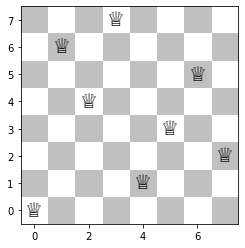

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

N_GENERATION = 500 # No of Generations
POPULATION_SIZE = 150 # Population in each generation
BOARD_SIZE = 8 # Size of the board N x N
EXP_FACTOR = 2 # Exponential power of selection
NO_OF_PARENTS_FOR_SELECTION = 50 # No of parents to be selected 

# Class for implementing n-queens problem
class Chess:
  def __init__(self, board_size):
    self.board_size = board_size
  
  # Method to generate initial population
  def generate_initial_population(self, population_size):
    '''
    Generates population of randomly ordered strings representing queens order
    (x,arr[x] represent x,y for the queen's positon)
    '''
    population=[]
    for i in range(population_size):
      l = list(range(0,self.board_size))
      random.shuffle(l)
      population.append(l)
    return population

  # Plots board for entire population
  def display_population(self, population, rows_to_display=None):
    if(rows_to_display is None): rows_to_display=len(population)
    for order in population[:rows_to_display]:
      self.plot_chess_board(order)

  # Plots board for a single chromosome
  def plot_chess_board(self, order):
    chessboard = np.ones((BOARD_SIZE, BOARD_SIZE)) 
    chessboard[1::2,0::2] = 0.75 
    chessboard[0::2,1::2] = 0.75
    plt.imshow(chessboard, cmap='gray', origin='lower', vmin=0, vmax=1) 
    for x in range(BOARD_SIZE):
      plt.text(x, order[x], '♕', fontsize=20, ha='center', va='center')

  # returns slope for checking queens in same diagonal 
  def get_slope(self, position1, position2):
    x1, y1 = position1
    x2, y2 = position2
    slope = (y1-y2)/(x1-x2)
    return slope

  # returns no of queens in attack
  def no_of_queens_in_attack(self, order):
    sum1=0
    position = [(x,y) for x, y in enumerate(order)]
    
    same_row_count = 0 # all row indexes are unique so no duplicate rows 
    same_column_count = 0
    # calculate duplicate column count
    for i in set(order): same_column_count+= order.count(i) if order.count(i)>1 else 0

    same_diagonal_count=0
    # calculate points in diagonal i.e. slope is +1 or -1
    for i in position:
      for j in position:
        if(i==j): continue
        elif(abs(self.get_slope(i,j))==1):  same_diagonal_count+=1
    
    same_diagonal_count=int(same_diagonal_count/2) # to get rid of duplicate entries
    return same_row_count + same_column_count + same_diagonal_count


  # returns fitness of the chromosome based on queens under attack
  def fitness(self, curr_order):
    ''' 
    SUBTRACTING FROM 100 TO CONVERT TO MAXIMIZATION PROBLEM
    higher fitness is better, this means lower no of queens in attacks 
    maximum fitness of the chromosome would be 100 when no queens are under attack
    '''
    return (100 - self.no_of_queens_in_attack(curr_order))
  
  # Return list of parents selected for crossover
  def selection(self, curr_generation):
    '''
    Using Roulette Wheel selection 
    '''
    number_of_parents = NO_OF_PARENTS_FOR_SELECTION #no of parents to be selected
    parents = []
    curr_generation.sort(key = self.fitness, reverse=True) #sorts the population list in desc order based on fitness values

    for i in range(number_of_parents):
      rand = random.random() #generate a random float between 0 and 1
      rand_Index = int(POPULATION_SIZE * pow(rand, EXP_FACTOR)) #grow the random float using exponential power so that the better chances of selection are from ones that have lowest fitness (less queens under attack)
      #print(rand, rand_Index, self.no_of_queens_in_attack(curr_generation[rand_Index]))
      parents.append(curr_generation[rand_Index])
    
    return parents

  # Returns child chromosomes after crossover
  def crossover(self, order1, order2):
    indexes = range(self.board_size)
    crossover_point = random.choice(indexes)

    new_order1 = order1[:crossover_point] + order2[crossover_point:]
    new_order2 = order2[:crossover_point] + order1[crossover_point:]

    return new_order1, new_order2

  # Perform mutatation on the chromosome
  def mutation(self, order):
    indexes = range(self.board_size)
    mutation_point1 = random.choice(indexes)
    mutation_point2 = random.choice(indexes)
    
    order[mutation_point1], order[mutation_point2] = order[mutation_point2], order[mutation_point1] 
    return order

  # Auxilary function to randomize mutation
  def mutation_choice(self, child1, child2):
    options = [1, 2, 3] 
    '''
    1-> Mutate child1
    2-> Mutate Child2
    3-> Mutate Both
    '''
    chosen = random.choice(options)
    if(chosen==1): child1 = self.mutation(child1)#; print("child1")
    elif(chosen==2): child2 = self.mutation(child2)#; print("child2")
    else: child1, child2 = self.mutation(child1), self.mutation(child2)#; print("child1&2")
    
    return child1, child2

  # Get minimum and maximum fitness of population
  def get_min_max_fitness(self, population):
    fitness_array = [self.fitness(x) for x in population]
    return min(fitness_array), max(fitness_array)
  
  # Main method for Genetic Algorithm
  def genetic_algorithm(self, population, generation_count):

    population.sort(key = self.fitness, reverse=True)

    # Generation 0 = initial population
    generation=[]
    generation.append([x for x in population]) #copy initial population in generation 0
    min_fitness, max_fitness = self.get_min_max_fitness(generation[0])
    print(f"minimum and maximum fitness for initial population is {min_fitness, max_fitness}")

    for i in range(1,generation_count+1):

      generation.append([x for x in generation[i-1]]) #clone previous generation

      # WHEN NO OF PARENTS SELECTED FOR REPRODUCTION IS MORE THAN 2, we get a list of parents, stored in the parents variable

      parents = self.selection(generation[i])
      
      for counter in range(0,NO_OF_PARENTS_FOR_SELECTION,2):
        parent1, parent2 = parents[counter : counter + 2] #select parents for reproduction
        child1, child2 = self.crossover(parent1, parent2) #create offspring
        child1, child2 = self.mutation_choice(child1, child2) # MUTATION for either of the 2 children or both

        generation[i][-counter-1], generation[i][-counter-2] = child1, child2 # Replace parents with lowest fitness with newer children


      min_fitness, max_fitness = self.get_min_max_fitness(generation[i])

      if max_fitness == 100: # termination condition reached
        generation[i].sort(key = self.fitness, reverse=True)  
        elem = generation[i][0] 
        self.plot_chess_board(elem)
        print(elem)
        print(f"Chess Piece with 0 queens in attack found at Generation {i}")
        break

      print(f"minimum and maximum fitness for generation {i} is {min_fitness, max_fitness}")
    
    else: # if all generations completed but optimal solution not found, display the best possible route
      generation[-1].sort(key = self.fitness, reverse=True)
      elem = generation[-1][0] 
      self.display_population(generation[-1],10) # Displays the best 10 chess pieces
      print(elem, self.no_of_queens_in_attack(elem))

'''
Main function starts here
'''
chess = Chess(BOARD_SIZE)
population = chess.generate_initial_population(POPULATION_SIZE)
chess.genetic_algorithm(population, N_GENERATION)



## Discussions
In this task, we created a program to implement the solution to 8-queens problem using Genetic Algorithm.

**Q1.** Explain how you would design a genetic algorithm to solve the problem. Specify the encoding scheme, fitness function and genetic operators. <br>
> **Ans**. To design a solution to the 8-queens problem using genetic algorithm, we would formulate the algorithm as:<br>
1.   **Encoding Scheme**: We would encode the solution as a list of N integers (8 for 8-queens, 12 for 12-queens), where each integer represents the column and its index represents the row of the queen placement on the chess board.<br>
For eg. [1, 5, 6, 3, 7, 2, 8]<br>
2.   **Fitness Function**: Fitness is inversely proportional to the number of queens under attack. To convert this relationship into a maximization problem, we calculate fitness as number of queens under attack subtracted from a maximum number, e.g. 100 in our case. <br>
Fitness = 100 - number of queens under attack<br>
3.   **Genetic Operators**:<br>
  1.   **Selection**: Tournament selection or roulette wheel selection based on fitness values could be implemented for our problem.
  2.   **Crossover**: Using single-point crossover, we swap the part of the chromosomes between ths two parents. 
  3.   **Mutation**: Mutation could be implemented by randomly swapping one of the bits in the individual chromosome with another randomly selected bit from the same chromosome.

**Q2.** Complete the program and generate a solution to the problem. <br>
> **Ans**. The completed code is implemented in the *genetic_algorithm* method of *Chess* class. <br>
One of the solutions given by the program for 8-queens problem is [4, 6, 0, 3, 1, 7, 5, 2] where none of the 8 queens on the boards are under check.
<br>Another solution provided by the program is shown below
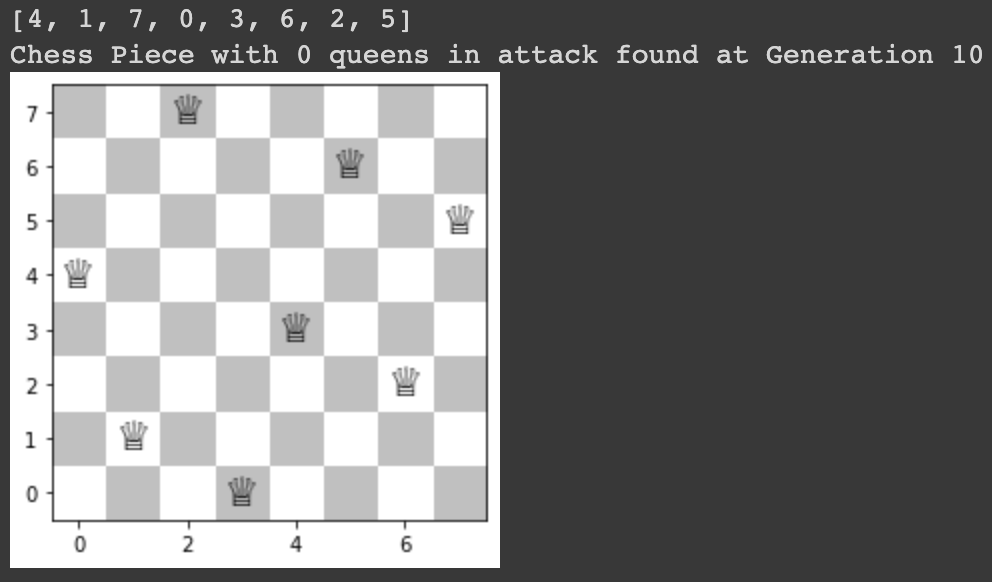

**Q3.** Change the problem to 12-queens, and report a solution. <br>
> **Ans**. To change the problem to 12-queens, we change the parameter BOARD_SIZE to 12. Rest of the code would remain the same.<br>
One of the solutions given by the program for 12-queens problem is [2, 8, 6, 11, 0, 5, 1, 4, 7, 10, 3, 9] where none of the 12 queens on the boards are under check.

## Task 3.3 The Map Colouring Problem

---

### Problem Descriptions
**The map colouring problem** is to colour a map with maximal number of different colours so that no neighbouring regions in the map have the same colour. 


## Implementation and Results

In the code below, we're creating a class **Map** implementing Genetic Algorithm to the map colouring problem, containing the following methods:
1.   **generate_initial_population**: generates population of randomly ordered strings where each literal represents colour index for that particular position
2.   **fitness**: returns (100 - number of neighbours with the same colour), implying maximum fitness 100 would be achieved when no neighbours have the same color.
3.   **crossover**: genetic operator that performs crossover on two lists and returns two new lists created through combination of the two parent lists at a random crossover point.
4.   **mutation**: genetic operator that performs mutation by swapping the values at two random indexes in the list.
5.   **selection**: performs selection using the roulette wheel method
6.   **genetic_algorithm**: main method for running the GA. It performs the genetic operators on the population until either termination condition (maximum fitness of the generation equals 100, i.e. no neighbours have the same colour) is reached or the number of generations are completed.
7.   **same_colour_neighbours**: returns the number of neighbours that have the same colour, by checking if the two literals in the list are neighbours in the adjacency matrix and if they have the same colour.
8.   Other utility function such as *mutate_until_unique* to only have unique chromosomes in the population, *is_neighbour* to check if the two elements are neighbours in the adjacency matrix, *get_min_max_fitness* to get minimum and maximum fitness in a generation, and *display_population* to display the names and associated colours in the population.

Comments are included in the code to explain the purpose of each method.



In [3]:
import random

N_GENERATION = 100 # no of generation
POPULATION_SIZE = 5 # no of chromosomes in a generation
EXP_FACTOR = 1 # Exponential power of selection
NO_OF_PARENTS_FOR_SELECTION = 2 # no of parents for selection
NUM_COLOURS = 4 # number of colours to be used
NUM_NAMES = 11 # number of regions
COLOURS = ('red', 'green', 'blue', 'gray') # name of colours
NAMES = ('Mark', 'Julia', 'Steve', 'Amanda', 'Brian',
         'Joanne', 'Derek', 'Allan', 'Michelle', 'Kelly', 'Chris') # name of regions
# Adjacency matrix
neighbours =  [ 
              [0,1,1,0,0,0,0,0,0,0,0],
              [0,0,1,1,1,0,1,0,0,0,0],
              [0,0,0,1,0,0,0,1,1,0,0],
              [0,0,0,0,0,1,1,0,1,0,0],
              [0,0,0,0,0,0,1,0,0,1,0],
              [0,0,0,0,0,0,1,0,1,1,1],
              [0,0,0,0,0,0,0,0,0,1,1],
              [0,0,0,0,0,0,0,0,1,0,0],
              [0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,1],
              [0,0,0,0,0,0,0,0,0,0,0]]

# Class for implementing map colouring problem
class Map:
  # constructor
  def __init__(self, num_names, names, num_colours, colours, neighbours):
    self.num_names = num_names
    self.names = names
    self.num_colours = num_colours
    self.colours = colours
    self.neighbours = neighbours

  # Generates population of randomly ordered integers lists
  def generate_initial_population(self, population_size):
    '''Generates population of randomly ordered integer lists where each literal represents colour index for that particular position'''
    population=[]
    for i in range(population_size):
      elem = [random.randint(0,self.num_colours-1) for x in range(self.num_names)]
      population.append(elem)
    return population
  
  # Displays population in a generation
  def display_population(self, population, rows_to_display=None):
    if(rows_to_display is None): rows_to_display=len(population)
    for curr_elem in population[:rows_to_display]:
      print("\n")
      for x,y in enumerate(curr_elem):
        print(f"Name: {self.names[x]}, Colour: {self.colours[y]}")

  # Checks if two regions are neighbours in the adjacency matrix
  def is_neighbour(self, i, j):
    return (self.neighbours[i][j]==1)
  
  # Returns total number of neighbours having the same colour
  def same_colour_neighbours(self, curr_population):
    sum1=0
    names_count=self.num_names
    count = 0
    for i in range(names_count):
      count=0
      for j in range(names_count):
        if(i==j): continue
        colour_i, colour_j = curr_population[i],curr_population[j] # Get value of colours
        if((colour_i==colour_j) and (self.is_neighbour(i,j))): # Also check if they're neighbours]
          count += 1
      sum1 += count
    return sum1

  # Calculate fitness for a population
  def fitness(self, curr_population):
    ''' 
    SUBTRACTING FROM 100 TO CONVERT TO MAXIMIZATION PROBLEM
    higher fitness is better, this means lower no of neighbours with same colour
    maximum fitness of the chromosome would be 100 when no neighbours have the same colour
    '''
    return (100 - self.same_colour_neighbours(curr_population))
  
  # Return minimum and maximum fitness of a population
  def get_min_max_fitness(self, curr_population):
    fitness_array = [self.fitness(x) for x in curr_population]
    return min(fitness_array), max(fitness_array)

  # Genetic operation: Single-point crossover
  def crossover(self, order1, order2):
    indexes = range(self.num_names)
    crossover_point = random.choice(indexes)

    new_order1 = order1[:crossover_point] + order2[crossover_point:]
    new_order2 = order2[:crossover_point] + order1[crossover_point:]

    return new_order1, new_order2

  # Genetic operator: Two-point mutation
  def mutation(self, order):
    indexes = range(1,len(order))
    mutation_point1 = random.choice(indexes)
    mutation_point2 = random.choice(indexes)
    order[mutation_point1], order[mutation_point2] = order[mutation_point2], order[mutation_point1] 
    return order

  # Prevents duplicate children in the population
  def mutate_until_unique(self,child,curr_generation):
    child=self.mutation(child)
    while(child in curr_generation):
      child = self.mutation(child)
    return child

  # Return list of parents selected on basis of their fitness
  def selection(self, curr_generation):
    '''
    Using Roulette Wheel selection
    '''
    number_of_parents = NO_OF_PARENTS_FOR_SELECTION #no of parents to be selected
    parents = []
    curr_generation.sort(key = self.fitness, reverse=True) #sorts the population list in descending order based on fitness values

    for i in range(number_of_parents):
      rand = random.random() #generate a random float between 0 and 1
      rand_Index = int(POPULATION_SIZE * pow(rand, EXP_FACTOR)) #grow the random float using exponential power so that the better chances of selection are from ones that have lowest fitness (less queens under attack)
      parents.append(curr_generation[rand_Index])
    
    return parents
  
  # method for implementing genetic algorithm
  def genetic_algorithm(self, population, generation_count):
    population.sort(key = self.fitness, reverse=True) # Descending sort based on fitness values

    generation=[]
    generation.append([x for x in population]) #copy initial population in generation 0
    
    min_fitness, max_fitness = self.get_min_max_fitness(generation[0])
    print(f"minimum and maximum fitness for initial population is {round(min_fitness,2), round(max_fitness,2)}")

    for i in range(1,generation_count+1):

      generation.append([x for x in generation[i-1]]) #clone previous generation

      # WHEN NO OF PARENTS SELECTED FOR REPRODUCTION IS MORE THAN 2, we get a list of parents, stored in parents variable

      parents = self.selection(generation[i])

      generation[i].sort(key = self.fitness, reverse=True) 

      for a in range(0,NO_OF_PARENTS_FOR_SELECTION,2):
        parent1, parent2 = parents[a:a+2] #select parents for reproduction
        child1, child2 = self.crossover(parent1, parent2) #create offspring

        child1 = self.mutate_until_unique(child1, generation[i])
        child2 = self.mutate_until_unique(child2, generation[i])

        generation[i][-1-a], generation[i][-2-a] = child1, child2 # Replace parents with lowest fitness with newer children

      min_fitness, max_fitness = self.get_min_max_fitness(generation[i])

      if max_fitness == 100: # termination condition reached
        print("\nOrder found")
        generation[-1].sort(key = self.fitness, reverse=True)  
        elem = generation[-1][0] 
        self.display_population(generation[-1],1)
        print(f"\nOrder of colours among cities : {elem}, neighbours with same colour is **{self.same_colour_neighbours(elem)}**")
        break

      print(f"minimum and maximum fitness for initial population is {round(min_fitness,2), round(max_fitness,2)}")
    
    else:
      generation[-1].sort(key = self.fitness, reverse=True)  
      elem = generation[-1][0] 
      self.display_population(generation[-1],1)
      print("ORDER NOT FOUND, would need more generations")
      print(f"Best Order so far : {elem}, BEST VALUE OF neighbours with same colour is **{self.same_colour_neighbours(elem)}**")
      


'''
Main function starts here
'''

map=Map(NUM_NAMES, NAMES, NUM_COLOURS, COLOURS, neighbours)
population = map.generate_initial_population(POPULATION_SIZE)
map.genetic_algorithm(population, N_GENERATION)


minimum and maximum fitness for initial population is (89, 98)
minimum and maximum fitness for initial population is (92, 98)
minimum and maximum fitness for initial population is (94, 98)
minimum and maximum fitness for initial population is (94, 98)
minimum and maximum fitness for initial population is (95, 98)
minimum and maximum fitness for initial population is (93, 98)
minimum and maximum fitness for initial population is (92, 98)
minimum and maximum fitness for initial population is (93, 98)
minimum and maximum fitness for initial population is (93, 98)
minimum and maximum fitness for initial population is (96, 98)
minimum and maximum fitness for initial population is (96, 98)
minimum and maximum fitness for initial population is (95, 98)
minimum and maximum fitness for initial population is (96, 98)
minimum and maximum fitness for initial population is (97, 98)
minimum and maximum fitness for initial population is (97, 99)
minimum and maximum fitness for initial population is (

## Discussions
In this task, we created a program to implement the solution to map colouring problem using Genetic Algorithm.

**Q1.** Explain how you would design a genetic algorithm to solve the problem. Specify the encoding scheme, fitness function and genetic operators. <br>
> **Ans**. To design a solution to the map colouring problem using genetic algorithm, we would formulate the algorithm as:<br>
1.   **Encoding Scheme**: We would encode the solution as a list of N integers where N represents the no. of regions (11 in the code above), where each integer represents the colour index for that particular position<br>
For eg. [3, 2, 1, 3, 3, 2, 0, 2, 0, 1, 3]<br>
2.   **Fitness Function**: Fitness is inversely proportional to the number of neighbours having the same color. To convert this relationship into a maximization problem, we calculate fitness as number of neighbours with the same color subtracted from a maximum number, e.g. 100 in our case. <br>
Fitness = 100 - number of neighbours having the same color<br>
3.   **Genetic Operators**:<br>
  1.   **Selection**: Tournament selection or roulette wheel selection based on fitness values could be implemented for our problem.
  2.   **Crossover**: Using single-point crossover, we swap the part of the chromosomes between ths two parents. 
  3.   **Mutation**: Mutation could be implemented by randomly swapping one of the bits in the individual chromosome with another randomly selected bit from the same chromosome.

**Q2.** Complete the program and generate a solution to the problem. <br>
> **Ans**. The completed code is implemented in the *genetic_algorithm* method of *Map* class. <br>
One of the solutions given by the program for map-colouring problem is [3, 2, 1, 3, 3, 2, 0, 2, 0, 1, 3], where none of the neighbours have the same colour.